In [129]:
# connect google drive into colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
import pandas as pd

# Replace 'your_file.csv' with the path to your dataset in Google Drive
file_path = '/content/drive/My Drive/Multi Project/student_dataset.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Drop rows with any missing (null) values
df_clean = df.dropna()

# Optionally, save the cleaned dataset back to Drive
df_clean.to_csv('/content/drive/My Drive/your_file_cleaned.csv', index=False)

# Display the cleaned DataFrame
print(df_clean)

      Student_ID First_Name Last_Name                           Email  Gender  \
0         S00001   Danielle      Levy        danielle1@university.edu  Female   
1         S00002      Angel    Ortega     angel.ortega@university.edu    Male   
2         S00003     Joshua     Lopez          joshua4@university.edu  Female   
3         S00004    Jeffrey    Powers          jpowers@university.edu  Female   
4         S00005       Jill  Robinson        jrobinson@university.edu  Female   
...          ...        ...       ...                             ...     ...   
49995     S49996      David    Lawson           david9@university.edu    Male   
49996     S49997     Jeremy     Davis          jeremy7@university.edu    Male   
49997     S49998    Timothy     Perry           s49998@university.edu  Female   
49998     S49999     Philip  Martinez  philip_martinez@university.edu    Male   
49999     S50000      Joyce   Aguilar           s50000@university.edu  Female   

       Age            Depar

In [131]:
# Drop student-Id

df_clean.drop(columns=['Student_ID'], inplace=True)

In [132]:
# Drop Duplicate

df_clean.drop_duplicates(inplace=True)

In [133]:
#Remove Outliers
def remove_outliers_iqr(df_clean):
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    Q1 = df_clean[numeric_cols].quantile(0.25)
    Q3 = df_clean[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    filtered_entries = ~((df_clean[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_clean[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
    return df_clean[filtered_entries]


In [134]:
#Encode Categorical Variables

# Example for one-hot encoding
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns
df1 = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

In [135]:
#Only Standardize Numeric Columns
from sklearn.preprocessing import StandardScaler
# Select only numeric columns for scaling
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns

# Standardize only numeric columns
scaler = StandardScaler()
df1[numeric_cols] = scaler.fit_transform(df1[numeric_cols])

In [153]:

#This is important packages

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=728c421514e1875f05c4e22ce228876102c4dec91eb4ba496751c3996f6fb502
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


In [163]:
# Doing PCA

In [162]:
# Select only numeric columns (should be all at this stage)
X = df1.select_dtypes(include=['float64', 'int64'])

In [138]:
# Fit PCA to all components
pca = PCA()
X_pca = pca.fit_transform(X)

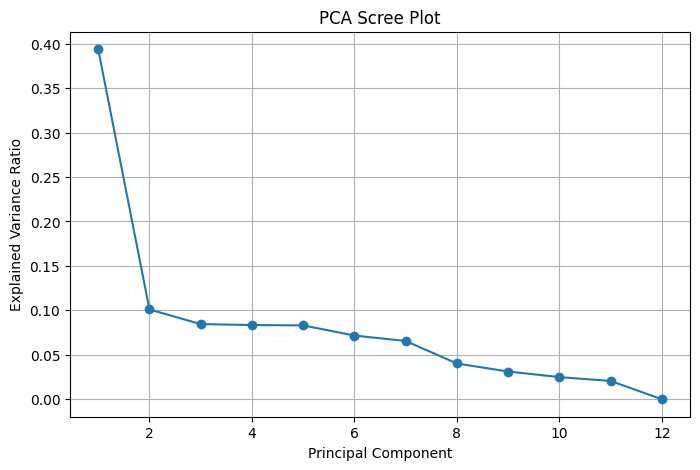

In [139]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Scree Plot')
plt.grid(True)
plt.show()

In [140]:
# Create a DataFrame with PCA values
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Save to CSV if needed
pca_df.to_csv('test_pca_values.csv', index=False)

# Show first few rows
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.151741 -0.786973 -0.100319 -1.035154 -0.210054  0.826829  0.471806   
1  3.099522  1.421058 -1.434349 -0.359198 -1.288357  1.537127  1.150175   
2 -1.353077 -0.943739  1.255167 -0.433755  0.696513  0.866376  0.644085   
3 -1.182937 -1.275760 -0.078315  2.503860  1.072916 -0.369052 -0.430132   
4  1.631461  0.661094  0.524026 -0.612933  0.393096  1.509965  0.408564   

        PC8       PC9      PC10      PC11          PC12  
0 -0.959820 -0.227762 -0.303034 -0.899540 -8.928616e-08  
1  0.353889 -0.612150 -0.112428 -0.528316 -3.019971e-04  
2  0.821798  0.886610  0.580503  0.250256  2.952615e-04  
3 -0.458733  0.364076 -0.021037 -0.048746 -3.029295e-04  
4 -0.145292 -0.674233  0.532014  0.182326  3.040540e-04  


In [141]:
pca = PCA(n_components=0.7)
X_pca = pca.fit_transform(X)
print("Number of components to retain 70% variance:", pca.n_components_)

Number of components to retain 70% variance: 5


In [142]:
import numpy as np

# After fitting PCA
explained_var_ratios = pca.explained_variance_ratio_

# Convert to percentage and round
explained_var_percent = np.round(explained_var_ratios * 100, 2)

# Print in the desired format (first 5 components as example)
print("The first five principal components explain:")
for i, pct in enumerate(explained_var_percent[:5], 1):
    print(f"PC{i}: {pct}%")

print(f"Total variance explained by first five PCs: {explained_var_percent[:5].sum()}%")


The first five principal components explain:
PC1: 39.39%
PC2: 10.1%
PC3: 8.45%
PC4: 8.35%
PC5: 8.31%
Total variance explained by first five PCs: 74.6%


In [170]:
import numpy as np
import pandas as pd

# Calculate PCA loadings (correlations between original variables and PCs)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame with loadings
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
loading_matrix = pd.DataFrame(
    loadings,
    columns=[f'PC{i+1}' for i in range(loadings.shape[1])],
    index=numeric_cols
)

# Display loadings for first 5 PCs
print("PCA Loadings Matrix (First 5 Components):")
print(loading_matrix.iloc[:, :5].round(3))

# Find the most important variables for each PC
print("\nMost Important Variables for Each PC:")
for i in range(5):  # First 5 PCs
    pc_name = f'PC{i+1}'
    # Get absolute loadings and sort
    abs_loadings = loading_matrix[pc_name].abs().sort_values(ascending=False)
    top_3_vars = abs_loadings.head(3)

    print(f"\n{pc_name}:")
    for var, loading in top_3_vars.items():
        direction = "positive" if loading_matrix.loc[var, pc_name] > 0 else "negative"
        print(f"  - {var}: {loading_matrix.loc[var, pc_name]:.3f} ({direction})")


PCA Loadings Matrix (First 5 Components):
                          PC1    PC2    PC3    PC4    PC5
Age                     0.002 -0.003 -0.055  0.832  0.550
Attendance (%)          0.128  0.021  0.907 -0.107  0.272
Midterm_Score           0.866 -0.009  0.024 -0.007  0.001
Assignments_Avg         0.890 -0.005  0.023 -0.003  0.004
Quizzes_Avg             0.823 -0.012  0.023 -0.010  0.007
Participation_Score     0.753 -0.007 -0.132  0.012 -0.045
Projects_Score          0.881 -0.014  0.028 -0.004  0.009
Total_Marks             0.995 -0.011  0.008 -0.004 -0.000
Study_Hours_per_Week    0.397  0.073 -0.283  0.057 -0.036
Parent_Education_Level -0.008 -0.035 -0.297 -0.542  0.785
Stress_Level (1-10)     0.022  0.778 -0.001  0.006  0.013
Sleep_Hours_per_Night  -0.002 -0.774  0.010  0.029 -0.021

Most Important Variables for Each PC:

PC1:
  - Total_Marks: 0.995 (positive)
  - Assignments_Avg: 0.890 (positive)
  - Projects_Score: 0.881 (positive)

PC2:
  - Stress_Level (1-10): 0.778 (positive)
  

In [161]:
#Donig Discriminant Anlysis

In [143]:
drop_cols = ['Student_ID', 'First_Name', 'Last_Name', 'Email']
df = df.drop(columns=drop_cols)

In [144]:
# List all categorical columns (except the target 'Grade')
categorical_cols = ['Gender', 'Department', 'Extracurricular_Activities',
                    'Internet_Access_at_Home', 'Parent_Education_Level']

In [145]:
# One-hot encode all categorical columns except the target
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [146]:
# Now separate features and target
X = df.drop(columns=['Grade'])
y = df['Grade']

In [147]:
# Encode the target variable (if not already numeric)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [148]:
# Remove rows with missing target (if any)
mask = pd.notna(y)
X = X[mask]
y_encoded = y_encoded[mask]

In [149]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

In [150]:
#  Fit LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

In [151]:
# Print results
print("Discriminant Analysis Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Discriminant Analysis Accuracy: 0.9552

Classification Report:
               precision    recall  f1-score   support

           A       0.99      0.96      0.98      2306
           B       0.96      0.97      0.96      3193
           C       0.96      0.98      0.97      3766
           D       0.89      0.97      0.93      3089
           F       1.00      0.88      0.93      2646

    accuracy                           0.96     15000
   macro avg       0.96      0.95      0.95     15000
weighted avg       0.96      0.96      0.96     15000



In [152]:
#  (Optional) Show LDA coefficients
import numpy as np
import pandas as pd
loadings = pd.DataFrame(
    lda.coef_.T, index=X.columns,
    columns=[f'LD{i+1}' for i in range(lda.coef_.shape[0])]
)
print("\nLDA Loadings (Coefficients for each Linear Discriminant Function):")
print(loadings.round(3))



LDA Loadings (Coefficients for each Linear Discriminant Function):
                                    LD1    LD2    LD3    LD4     LD5
Age                              -0.001 -0.003  0.001  0.003   0.000
Attendance (%)                   -0.002 -0.001  0.001 -0.000   0.001
Midterm_Score                     5.364  1.003 -0.176 -1.679  -3.673
Assignments_Avg                   4.336  0.820 -0.141 -1.365  -2.973
Quizzes_Avg                       3.221  0.604 -0.105 -1.009  -2.209
Participation_Score              21.392  3.992 -0.678 -6.695 -14.678
Projects_Score                    6.499  1.232 -0.214 -2.042  -4.463
Total_Marks                     -20.038 -3.285  0.771  6.122  13.183
Study_Hours_per_Week              0.011 -0.003 -0.004  0.001  -0.001
Stress_Level (1-10)              -0.019 -0.014  0.001  0.009   0.021
Sleep_Hours_per_Night            -0.020  0.001 -0.009  0.015   0.012
Gender_Male                      -0.084 -0.056  0.024  0.016   0.088
Department_Data Science           0

In [160]:
#Doig Factor Anlysis

In [156]:
drop_cols = ['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Department',
             'Grade', 'Extracurricular_Activities', 'Internet_Access_at_Home', 'Parent_Education_Level']
df_numeric = df.drop(columns=drop_cols)

# Ensure only numeric columns
df_numeric = df_numeric.select_dtypes(include=['float64', 'int64'])

In [167]:
# Choose number of factors (e.g., 3)
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(df_numeric)

#to handle jupyter warings
import warnings
warnings.filterwarnings("ignore", message=".*force_all_finite.*", category=FutureWarning)


In [168]:
# Factor loadings
loadings = pd.DataFrame(fa.loadings_,
                        index=df_numeric.columns,
                        columns=['Factor1', 'Factor2', 'Factor3'])
print("Factor Loadings:\n", loadings.round(2))

# Variance explained by each factor
variance = fa.get_factor_variance()
print("\nVariance Explained (per factor):\n", variance)

Factor Loadings:
                        Factor1  Factor2  Factor3
Age                       0.00     0.00    -0.00
Attendance (%)            0.05     0.01     0.62
Midterm_Score             0.83    -0.01     0.10
Assignments_Avg           0.86    -0.01     0.10
Quizzes_Avg               0.77    -0.01     0.09
Participation_Score       0.70    -0.00    -0.06
Projects_Score            0.85    -0.02     0.11
Total_Marks               1.02    -0.02     0.09
Study_Hours_per_Week      0.34     0.03    -0.03
Stress_Level (1-10)       0.03     0.86     0.01
Sleep_Hours_per_Night    -0.00    -0.25    -0.00

Variance Explained (per factor):
 (array([4.41236397, 0.793965  , 0.43459112]), array([0.401124  , 0.07217864, 0.03950828]), array([0.401124  , 0.47330263, 0.51281092]))


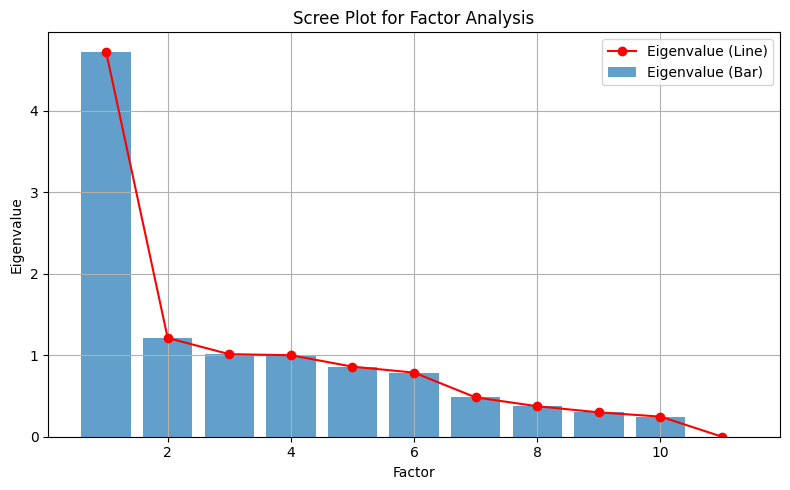

In [169]:
# Fit FactorAnalyzer with no rotation to get eigenvalues
fa = FactorAnalyzer(rotation=None)
fa.fit(df_numeric)

# Get eigenvalues
ev, v = fa.get_eigenvalues()

# Make the scree plot
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(ev)+1), ev, alpha=0.7, label='Eigenvalue (Bar)')
plt.plot(range(1, len(ev)+1), ev, marker='o', color='red', label='Eigenvalue (Line)')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot for Factor Analysis')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()